In [1]:
import json
import os

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

2024-03-21 21:56:57.282023: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 21:56:57.714415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 21:56:57.714479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 21:56:57.805921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 21:56:57.969243: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 21:56:57.971488: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
from sklearn.cluster import KMeans

In [69]:
import pickle

# Annotations

In this part, we must understand how the images are labelled to be able to preprocess it.

In [6]:
data_file = os.path.join(os.path.dirname(os.getcwd()), 'raw_data', 'chessred2k', 'annotations.json')
annot_file = open(data_file)
annot = json.load(annot_file)

In [7]:
annot.keys()

dict_keys(['info', 'images', 'annotations', 'categories', 'splits'])

In [8]:
[type(annot[key]) for key in annot.keys()]

[dict, list, dict, list, dict]

## Info values

In [9]:
annot['info'].keys()

dict_keys(['description', 'version', 'year', 'date_created', 'author'])

In [10]:
[type(annot['info'][key]) for key in annot['info'].keys()]

[str, str, int, str, str]

In [11]:
for val in annot['info'].values():
    print(val)

Chess Recognition Dataset (ChessReD)
1.0
2023
26/08/2023
Athanasios Masouris


## Images values

In [12]:
first_game = [image for image in annot['images'] if image['game_id'] == 0]
len(first_game)

103

In [13]:
first_game[0]

{'file_name': 'G000_IMG000.jpg',
 'path': 'images/0/G000_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 0,
 'move_id': 0,
 'id': 0}

In [14]:
first_game[102]

{'file_name': 'G000_IMG102.jpg',
 'path': 'images/0/G000_IMG102.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 0,
 'move_id': 102,
 'id': 102}

In [15]:
annot['images'][103]

{'file_name': 'G001_IMG000.jpg',
 'path': 'images/1/G001_IMG000.jpg',
 'camera': 'Huawei P40 pro',
 'height': 3072,
 'width': 3072,
 'game_id': 1,
 'move_id': 0,
 'id': 103}

Here is the understanding of the image key:
- 'file_name' gives obviously the name of the image
- 'path' provides the location. will be useful to define preprocessing functions with images as arguments
- 'height' and 'width' are quite obvious too.
- 'game_id' is associated to the number of the game. Not that useful at first glance
- 'move_id' won't be very useful either
- 'id' is the position of the image in the whole dataset. To be considered

## Annotations value

In [16]:
annot['annotations'].keys()

dict_keys(['pieces', 'corners'])

In [17]:
[type(annot['annotations'][key]) for key in annot['annotations'].keys()]

[list, list]

In [18]:
[len(annot['annotations'][key]) for key in annot['annotations'].keys()]

[223804, 2078]

In [19]:
annot["annotations"]['pieces'][0]

{'image_id': 0,
 'category_id': 7,
 'chessboard_position': 'a8',
 'id': 0,
 'bbox': [510.34, 963.65, 155.75, 186.14]}

In [20]:
annot["annotations"]['pieces'][223803]

{'image_id': 10799,
 'category_id': 7,
 'chessboard_position': 'd1',
 'id': 223803,
 'bbox': [581.57, 1188.01, 132.52, 209.77]}

In [21]:
annot["annotations"]['pieces'][1]

{'image_id': 0,
 'category_id': 8,
 'chessboard_position': 'b8',
 'id': 1,
 'bbox': [692.17, 877.29, 154.48, 211.46]}

In [22]:
annot["annotations"]['corners'][0]

{'image_id': 0,
 'corners': {'bottom_right': [2610.3, 1560.9],
  'top_right': [1772.23, 638.59],
  'top_left': [488.7, 1078.7],
  'bottom_left': [1063.3, 2304.1]},
 'id': 223804}

In [23]:
annot["annotations"]['corners'][1]

{'image_id': 1,
 'corners': {'top_right': [892.9, 931.7],
  'bottom_right': [2376.27, 994.8],
  'bottom_left': [2392.7, 2142.33],
  'top_left': [429.86, 1982.92]},
 'id': 223805}

## Categories value.

In [24]:
annot['categories']

[{'id': 0, 'name': 'white-pawn'},
 {'id': 1, 'name': 'white-rook'},
 {'id': 2, 'name': 'white-knight'},
 {'id': 3, 'name': 'white-bishop'},
 {'id': 4, 'name': 'white-queen'},
 {'id': 5, 'name': 'white-king'},
 {'id': 6, 'name': 'black-pawn'},
 {'id': 7, 'name': 'black-rook'},
 {'id': 8, 'name': 'black-knight'},
 {'id': 9, 'name': 'black-bishop'},
 {'id': 10, 'name': 'black-queen'},
 {'id': 11, 'name': 'black-king'},
 {'id': 12, 'name': 'empty'}]

## Splits value

In [25]:
annot['splits'].keys()

dict_keys(['train', 'val', 'test', 'chessred2k'])

In [26]:
annot['splits']['chessred2k']['train'].keys()

dict_keys(['image_ids', 'n_samples'])

## Creating board Y-value

### Building utils functions and making some tests

In [27]:
len(annot['images'])

10800

In [28]:
pieces_game_zero = [annot["annotations"]['pieces'][i] for i in range(223804) if annot["annotations"]['pieces'][i]['image_id'] == 0]

In [29]:
len(pieces_game_zero)

32

In [30]:
def array_board(pieces_game:list):
    res_array = np.ones((8,8))*12
    letter_conv = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7}
    for piece in pieces_game:
        pos = piece['chessboard_position']
        row, col = 8-int(pos[1]), letter_conv[pos[0]]
        res_array[row, col] = piece['category_id']
    return res_array

In [31]:
game_board_zero = array_board(pieces_game_zero)

In [32]:
fen_str = "PRNBQKprnbqk"
id_range = [i for i in range(12)]
dict_fen = dict([(k, fen_str[k]) for k in id_range])
dict_fen

{0: 'P',
 1: 'R',
 2: 'N',
 3: 'B',
 4: 'Q',
 5: 'K',
 6: 'p',
 7: 'r',
 8: 'n',
 9: 'b',
 10: 'q',
 11: 'k'}

In [33]:
# Empty board case set to 1 to handle more easily the FEN conversion
dict_fen[12] = 1

In [34]:
def row_converter(board_row:np.ndarray):
    str_res = ''
    null_count = 0
    for elem in board_row:
        if int(elem) != 12:
            if null_count != 0:
                str_res += str(null_count)
                null_count = 0
            str_res += dict_fen[int(elem)]
        else:
            null_count += 1
    if null_count != 0:
        str_res += str(null_count)
    return str_res

In [35]:
row_converter(game_board_zero[7,:])

'RNBQKBNR'

In [36]:
def board_to_fen(board:np.ndarray):
    convert = [row_converter(board[i,:]) for i in range(8)]
    res = "/".join(convert)
    return res

In [37]:
board_to_fen(game_board_zero)

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR'

### Sealing the deal

In [38]:
nb_images = len(annot['images'])

In [39]:
# Gathering the pieces of the same game
pieces_game_list = []
i, k = 0, 0
while k < nb_images:
    same_image = True
    tmp_pieces = []
    while i < 223804 and same_image:
        if len(tmp_pieces) == 0:
            tmp_pieces.append(annot["annotations"]['pieces'][i])
            i += 1
        else:
            if annot["annotations"]['pieces'][i]['image_id'] == k:
                tmp_pieces.append(annot["annotations"]['pieces'][i])
                i += 1
            else:
                same_image = False
    pieces_game_list.append(array_board(tmp_pieces))
    k += 1

In [40]:
# Building a copy of the 'images' annotation value
output_info = annot['images']

In [41]:
annot['images'][10799]

{'file_name': 'G099_IMG099.jpg',
 'path': 'images/99/G099_IMG099.jpg',
 'camera': 'Samsung Galaxy S8',
 'height': 3024,
 'width': 3024,
 'game_id': 99,
 'move_id': 99,
 'id': 10799}

In [42]:
pieces_game_list[10799]

array([[12., 12., 12., 12., 12., 12., 12., 12.],
       [12., 12., 12.,  0., 12., 12., 12.,  6.],
       [12.,  6., 12., 12., 12., 12., 12., 12.],
       [ 6., 12., 12.,  2., 12., 12., 12.,  5.],
       [12., 12.,  0., 12., 12., 12., 12.,  0.],
       [11.,  0., 12., 12., 12., 12., 12., 12.],
       [ 0., 12., 12., 12.,  1., 12., 12., 12.],
       [12., 12., 12.,  7., 12., 12., 12., 12.]])

In [43]:
for i in range(nb_images):
    output_info[i]['fen'] = board_to_fen(pieces_game_list[i])

In [44]:
import pandas as pd

In [45]:
reverse_dict = {'file_name' : [output_info[i]['file_name'] for i in range(nb_images)],\
                'game_id' : [output_info[i]['game_id'] for i in range(nb_images)],\
               'fen': [output_info[i]['fen'] for i in range(nb_images)]}

In [46]:
pd_output = pd.DataFrame.from_dict(reverse_dict)
pd_output.head()

,file_name,game_id,fen
0,G000_IMG000.jpg,0,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
1,G000_IMG001.jpg,0,rnbqkbnr/pppppppp/8/8/1P6/8/P1PPPPPP/RNBQKBNR
2,G000_IMG002.jpg,0,rnbqkbnr/ppp1pppp/8/3p4/1P6/8/P1PPPPPP/RNBQKBNR
3,G000_IMG003.jpg,0,rnbqkbnr/ppp1pppp/8/3p4/1P6/8/PBPPPPPP/RN1QKBNR
4,G000_IMG004.jpg,0,rn1qkbnr/ppp1pppp/8/3p1b2/1P6/8/PBPPPPPP/RN1QKBNR


We have created a Dataframe which associates a fen with the concerned image of the raw dataset. We can now work on the image dataset.

# Images 

We will now perform the cleaning of the images dataset. The goal is to reduce its size and to convert it into a proper tensor/array for training purposes.

In [47]:
pd_output.tail()

,file_name,game_id,fen
10795,G099_IMG095.jpg,99,8/7p/1p1P4/p6K/1kP2N1P/1P6/P3R3/6r1
10796,G099_IMG096.jpg,99,8/7p/1p1P4/p6K/1kP2N1P/1P6/P3R3/3r4
10797,G099_IMG097.jpg,99,8/7p/1p1P4/p2N3K/1kP4P/1P6/P3R3/3r4
10798,G099_IMG098.jpg,99,8/7p/1p1P4/p2N3K/2P4P/kP6/P3R3/3r4
10799,G099_IMG099.jpg,99,8/3P3p/1p6/p2N3K/2P4P/kP6/P3R3/3r4


In [48]:
images_path = os.path.join(os.path.dirname(os.getcwd()), 'raw_data', 'chessred2k', 'images')

In [49]:
pd_output[pd_output['game_id'] == 72]

,file_name,game_id,fen
7966,G072_IMG000.jpg,72,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR
7967,G072_IMG001.jpg,72,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR
7968,G072_IMG002.jpg,72,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR
7969,G072_IMG003.jpg,72,rnbqkb1r/pppppppp/5n2/8/2PP4/8/PP2PPPP/RNBQKBNR
7970,G072_IMG004.jpg,72,rnbqkb1r/pppppp1p/5np1/8/2PP4/8/PP2PPPP/RNBQKBNR
...,...,...,...
8062,G072_IMG096.jpg,72,8/3K3p/R2N2p1/5pk1/P6r/r7/8/8
8063,G072_IMG097.jpg,72,8/3K3p/R2N2p1/P4pk1/7r/r7/8/8
8064,G072_IMG098.jpg,72,8/3K3p/R2N2p1/P4pk1/r7/r7/8/8
8065,G072_IMG099.jpg,72,8/3K1N1p/R5p1/P4pk1/r7/r7/8/8


## Utils functions

In [50]:
# We define the list of the games whose move pictures have been shot
image_folder_list = [0, 19, 22, 28, 33, 38, 41, 42, 47, 56, 58, 6, 61, 72, 76, 78, 83, 87, 91, 99]

In [51]:
pd_filtered_output = pd_output[pd_output["game_id"].isin(image_folder_list)].copy()
pd_filtered_output.shape

(2078, 3)

In [52]:
# To read images faster
path_builder = lambda folder : os.path.join(images_path,str(folder))

## Images reading tests

### Loading test

In [53]:
labels_0 = list(pd_filtered_output[pd_filtered_output["game_id"] == 0]["file_name"])

In [54]:
dir_0_dataset= tf.keras.utils.image_dataset_from_directory(directory=os.path.join(images_path,str(pd_filtered_output.loc[0, "game_id"])), labels=labels_0, batch_size=None, image_size=(1024,1024))

Found 103 files belonging to 103 classes.


2024-03-21 21:57:07.228861: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 21:57:07.229380: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [55]:
dir_0_list = list(dir_0_dataset.as_numpy_iterator())

### Displaying the result

In [56]:
str(dir_0_list[0][1]).strip("b\'")

'G000_IMG002.jpg'

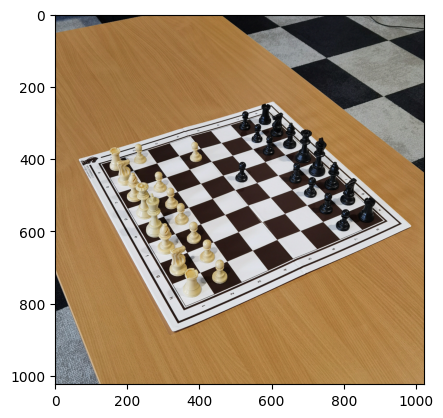

In [57]:
plt.imshow(dir_0_list[0][0]/255)

## Compressing the images

### Building and testing

In [58]:
image_test = dir_0_list[0][0]/255
im_dim = image_test.shape

In [59]:
float_cv_reshaped = image_test.reshape((im_dim[0]*im_dim[1], im_dim[2]))

In [60]:
# Apply the elbow method to find the optimal number of clusters.
clusters = list(range(1, 51))
wcss = [KMeans(n_clusters=i).fit(float_cv_reshaped).inertia_ for i in clusters]

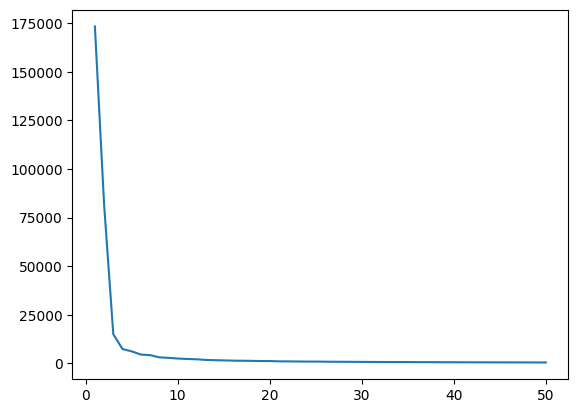

In [61]:
plt.plot(clusters, wcss)

From the elbow method, we decide to compress chess game images into 30 color clusters.

In [62]:
zip_model = KMeans(n_clusters=30).fit(float_cv_reshaped)

In [63]:
zip_model.labels_

array([11, 29, 29, ...,  0,  0,  0], dtype=int32)

In [64]:
X_compressed = np.array([zip_model.cluster_centers_[i,:] for i in zip_model.labels_])
X_compressed

array([[0.2306143 , 0.23232609, 0.24860495],
       [0.13964099, 0.14895687, 0.16621503],
       [0.13964099, 0.14895687, 0.16621503],
       ...,
       [0.72742546, 0.55700976, 0.3366472 ],
       [0.72742546, 0.55700976, 0.3366472 ],
       [0.72742546, 0.55700976, 0.3366472 ]], dtype=float32)

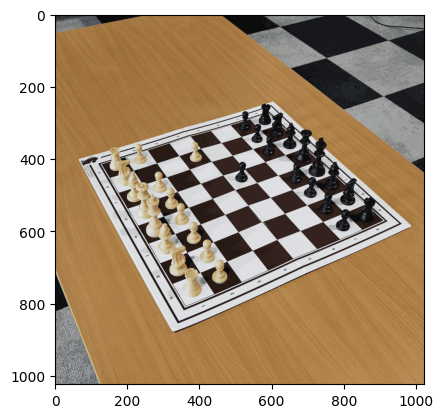

In [65]:
X_compressed = X_compressed.reshape(im_dim)
plt.imshow(X_compressed)

In [66]:
X_prediction = zip_model.predict(float_cv_reshaped)
X_prediction == zip_model.labels_

array([ True,  True,  True, ...,  True,  True,  True])

In [67]:
def img_compressed(image):
    flat_image = image.reshape((im_dim[0]*im_dim[1], im_dim[2]))
    label_img = zip_model.predict(flat_image)
    comp = np.array([zip_model.cluster_centers_[i,:] for i in label_img])
    return comp

### Loading the compressed data

In [68]:
def load_images(nb_folder):
    label = list(pd_filtered_output[pd_filtered_output["game_id"] == nb_folder]["file_name"])
    tf_dataset = tf.keras.utils.image_dataset_from_directory(directory=path_builder(nb_folder), labels=label, batch_size=None, image_size=(1024,1024))
    tmp_list = list(tf_dataset.as_numpy_iterator())
    return [(img_compressed(tmp_list[i][0]/255), str(tmp_list[i][1]).strip("b\'")) for i in range(len(tmp_list))]

# Saving preprocessed/cleaned data

In [75]:
# No need to run the file compressing model if already pickled
# with open(os.path.join(os.path.dirname(os.getcwd()),"processed_ir_data", "zip_model.pickle"), 'wb') as f:
#     pickle.dump(zip_model, f)

## Saving cleaned annotations data

In [70]:
# The code line is useless once it has been run already once
# pd_filtered_output.to_csv(os.path.join(os.path.dirname(os.getcwd()),"processed_ir_data", "output.csv"))

## Saving compressed and flattened images

In [73]:
# No need to run this cell if the files have already been stored in pickle objects
# for folder in image_folder_list:
#     with open(os.path.join(os.path.dirname(os.getcwd()),"processed_ir_data", f"compressed_game_{str(folder)}.pickle"), 'wb') as f:
#         pickle.dump(load_images(folder), f)